# Seaborn Introduction

Seaborn is built on top of matplotlib.  

By using sns.set(), seaborn style graphs can be created with standard matplotlib commmands.

Seaborn accepts Pandas DataFrames as input.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid') # enable seaborn style

In [2]:
print(f'Seaborn Version: {sns.__version__}')

Seaborn Version: 0.9.0


## Tips Dataset

In [3]:
# load example dataset
tips = sns.load_dataset('tips')
print(type(tips))
print(tips.shape)

<class 'pandas.core.frame.DataFrame'>
(244, 7)


#### Tips Columns
```
total_bill:  total in US dollars  
tip:         tip in US dollars  
sex:         sex of person paying the bill  
smoker:      anyone in the party a smoker?  
day:         Thur/Fri/Sat/Sun  
time:        Dinner/Lunch  
size:        number of people in party  
```

Tip as percentage of bill is more meaningful than actual tip value.

In [4]:
tips = tips.assign(tip_percent = 100.0 * tips['tip'] / tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


## Color Palettes
Many of the available palettes are presented on the following web page:  
https://matplotlib.org/tutorials/colors/colormaps.html

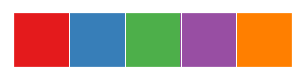

In [5]:
# display palette for Set1
sns.palplot(sns.color_palette("Set1", n_colors=5))

## Tips Categorical Plots

A box plot is good for plotting a numerical variable against a categorical variable.

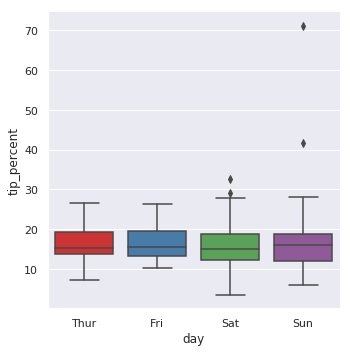

In [6]:
# day is a category, so use catplot
sns.catplot(x='day', y='tip_percent', kind='box', palette='Set1', data=tips);

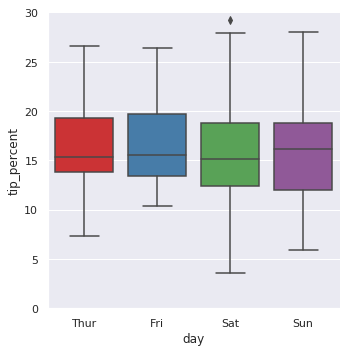

In [7]:
# enlarge the area of interest
# this no longer displays several outliers
g = sns.catplot(x='day', y='tip_percent', kind='box', palette='Set1', data=tips);
plt.ylim([0, 30]);

#### Above Suggests
that the tip percent is indepent of day.

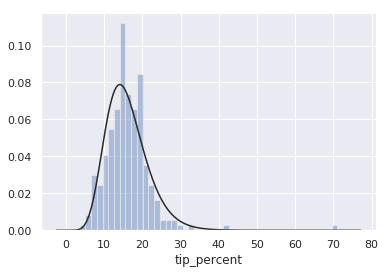

In [8]:
from scipy import stats
sns.distplot(tips['tip_percent'], fit=stats.lognorm, kde=False, bins=45);

#### Above Suggests
that the tip percent might be log normal.

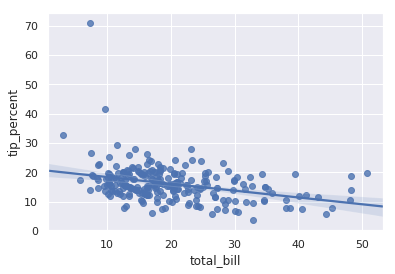

In [9]:
sns.regplot(x='total_bill', y='tip_percent', data=tips);

#### Above Suggests
that the tip percent decreases with the total size of the bill.  Presumably the tip is related to the amount of work the waiter has to do.  A bill that is twice as high as another, likely does not require the waiter to do twice the work.  So the negative slope seems reasonable.

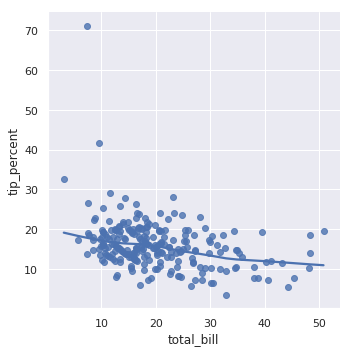

In [10]:
sns.lmplot(x='total_bill', y='tip_percent', lowess=True, data=tips);

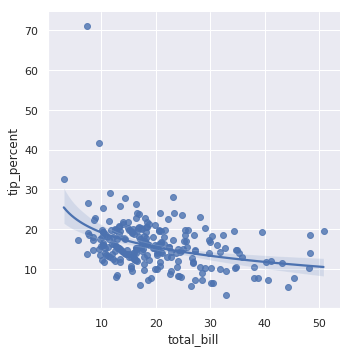

In [11]:
sns.lmplot(x='total_bill', y='tip_percent', logx=True, truncate=True, data=tips);

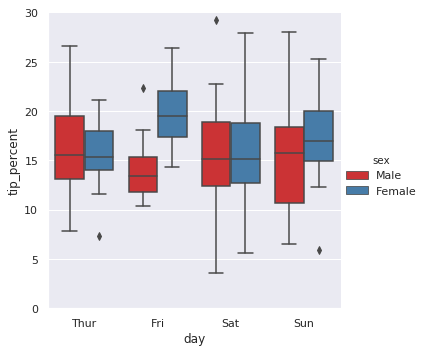

In [12]:
# as above, but also split by sex
sns.catplot(x='day', y='tip_percent', hue='sex', kind='box', palette='Set1', data=tips)
plt.ylim([0, 30]);

#### Above Suggests
there is a difference between tips from males and females on Fridays.  The difference appears practically significant to a waiter, who may chose to wait on females on Friday.  However without further analysis, it is not known whether or the difference is due to random chance or not.

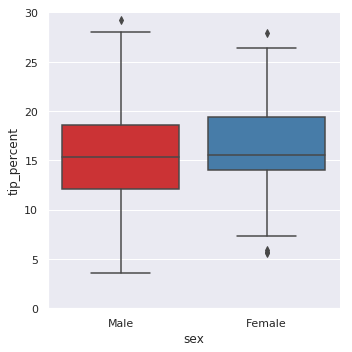

In [13]:
sns.catplot(x='sex', y='tip_percent', kind='box', palette='Set1', data=tips);\
plt.ylim([0, 30]);

#### Above Suggests
that across all days, there is probably no practical difference in tip percent between males and females.

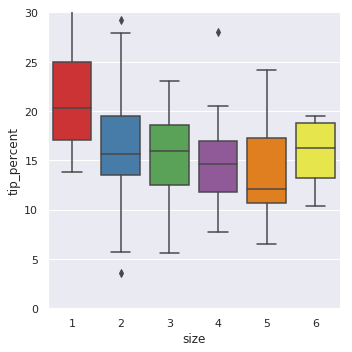

In [14]:
sns.catplot(x='size', y='tip_percent', kind='box', palette='Set1', data=tips)
plt.ylim([0, 30]);

#### Above Suggests
That people who eat alone may be the biggest tippers.  Let's create a box plot for that specific scenario.

In [15]:
tips = tips.assign(alone = tips['size'] == 1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent,alone
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,False
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,False
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,False
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,False
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,False


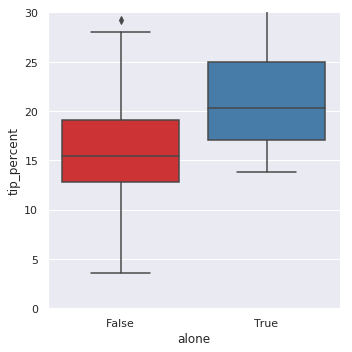

In [16]:
sns.catplot(x='alone', y='tip_percent', kind='box', palette='Set1', data=tips)
plt.ylim([0, 30]);

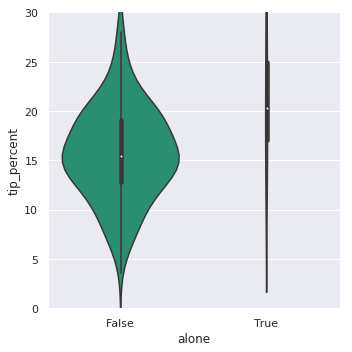

In [17]:
sns.catplot(x='alone', y='tip_percent', kind = "violin", scale="count", palette='Dark2', data=tips)
plt.ylim([0, 30]);

In [18]:
# what percent of parties had only a single person
tips['alone'].sum(), tips['alone'].mean(), tips['alone'].count()

(4, 0.01639344262295082, 244)

#### Above Suggests
There appears to be a practical difference, however there are only 4 parties of one person, which is likely too few to show statistical significant.  In other words, their is insufficient data to determine if the difference is due to chance or not.

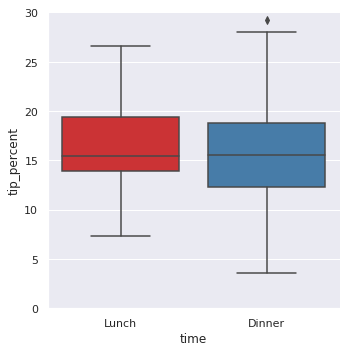

In [19]:
sns.catplot(x='time', y='tip_percent', kind='box', palette='Set1', data=tips)
plt.ylim([0, 30]);

#### Above Suggests
There appears to be no practical difference for tip percentage between lunch and dinner.

## Line Plots

In [20]:
# create a cubic and cube-root array
x = np.linspace(-10, 10, 101)
c1 = 10**(-2)
c2 = 10**(2/3)

# x cubed
y = c1 * x**3

# cube root of x, works for negative numbers
z = c2 * np.sign(x)*np.abs(x)**(1/3)

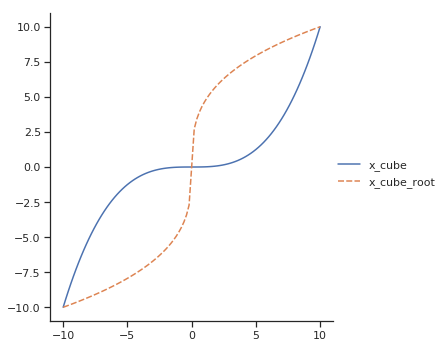

In [21]:
sns.set(style='ticks')
df = pd.DataFrame(data = zip(x,y,z), columns=['x','x_cube','x_cube_root'], index=x)
sns.relplot(data=df, kind='line');

## Temp Keep

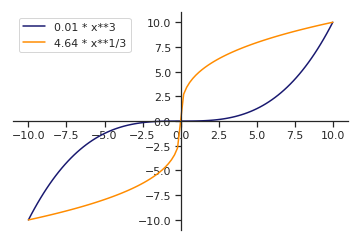

In [23]:
# customized axis (spines)
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

ax.plot(x, y, color = 'midnightblue', label=f'{c1:3.2f} * x**3')
ax.plot(x, z, color='darkorange', label=f'{c2:3.2f} * x**1/3')
ax.legend();

## Distribution Plots

By default these are normalized so that the area under the KDE curve is 1.0.

In [24]:
from scipy.stats import norm
xg = np.arange(-4, 4, 0.001)
gaussian = norm.pdf(xg, 0, 1)

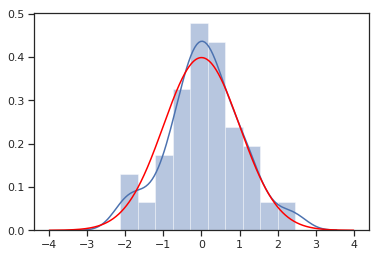

In [25]:
# plot a random normal distribution
from numpy.random import normal

# set seed for repeatability
np.random.seed(10)

# with a small number of points the KDE curve may be different than the observed value
x = normal(size=100)
sns.distplot(x)

# draw gaussian(1,0) in red
sns.lineplot(xg, gaussian, color='red');

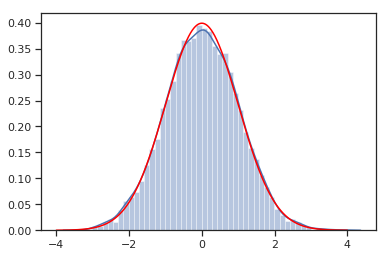

In [26]:
# with a large number of points, the KDE curve closely matches the Gaussian curve
np.random.seed(100)
x = normal(size=10000)
sns.distplot(x)

# Draw Gaussian in red
sns.lineplot(xg, gaussian, color='red');

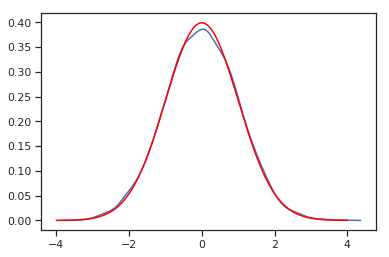

In [27]:
# with a large number of points, the KDE curve closely matches the Gaussian curve
np.random.seed(100)
x = normal(size=10000)
sns.distplot(x, hist=False)

# Draw Gaussian in red
sns.lineplot(xg, gaussian, color='red');

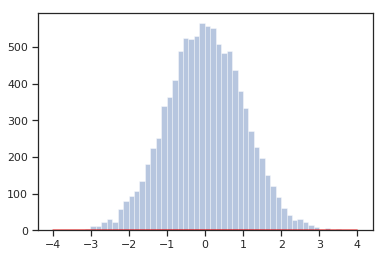

In [28]:
# with a large number of points, the KDE curve closely matches the Gaussian curve
np.random.seed(100)
x = normal(size=10000)
ax = sns.distplot(x, kde=False)

# Draw Gaussian in red
sns.lineplot(xg, gaussian, color='red');

## Pair Grid

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist)
g = g.map_lower(plt.scatter)
g = g.map_upper(sns.kdeplot)
g = g.add_legend()

#### Above Suggests
that there are pairs of values which do a good job separating the 3 classes of Iris.
1. (petal_length, sepal_width)
2. (petal_width, petal_length)

In [ ]:
# scatterplot of petal_width vs petal_length
sns.relplot(x="petal_length", y="petal_width", data=iris, 
            hue="species", kind="scatter");

#### Above Suggests
that a Machine Learning model created from just these two variables could do well at predicting the classes.